In [1]:
from __future__ import print_function

#Python for Business Analysts

##Introduction to Pandas

###1: Intro to Housing Affordability Data

We are going to explore how to use the programming language, Python, and the Python toolkit, Pandas, to analyze, clean, and visualize housing affordability data from HUD.gov. This dataset is derived from an annual survey conducted by the US Department of Housing & Urban Development (HUD) and has detailed information on the affordability of housing as it relates to income and other personal economic indicators.

###2: Why Python?

Python is one of the most popular computer programming languages and is used heavily by institutions ranging from government agencies, like the SEC, to fast-growing internet companies, like Dropbox and Facebook. In addition to being a good language for building web applications, Python is also becoming the most robust language for data analysis thanks in part to libraries like Pandas. Since Python is a great language for both analyzing data and for developing software products, learning it will unlock a wide range of opportunities.

Pandas is what is known as a library, built to work with the Python programming language. A library is a toolkit that allows us to incorporate additional functionality into our software. Most libraries in Python are usually open source, which means you can freely read and understand how it was written and organized.

###3: How Pandas Works

Similar to Excel, Pandas allows us to read in tabular data like CSV and Excel files into your computer's memory, or RAM (Random Access Memory). When data is stored on disk, it is at rest and slow to modify, but when it is loaded into memory from disk, your computer can interpret and modify the data much quicker. The trade-off is that while RAM is fast, it is limited in size (your computer probably has between 4 & 16 GB of memory). Disk drives usually range from 256 gigabytes to multiple terabytes. When data is larger than the amount of memory you have available, Python allows you to easly split up the data into chunks for processing.

Pandas first loads data into a DataFrame, a speed-optimized representation of the initial spreadsheet. After data is loaded into the DataFrame object (which is in memory), Pandas gives you superpowers by allowing you to slice, visualize, explore, and filter data incredibly quickly. There are a slew of other benefits of learning the Python & Pandas workflow, including being able to easily automate repetitive tasks, work with large files & datasets, utilize external datasets and API's, and even export data back to Excel formatted data (e.g. .XLS or .CSV) for others to interact with. 

In [2]:
import pandas

housing_2013 = pandas.read_csv("data/Hud_2013.csv")
housing_2013.head(5)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,...,'2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,...,'3 GT FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','-5','-5'


###4: Columns

As you can see, Pandas returns the first 5 rows of our dataset like a spreadsheet. While the original dataset has 99 columns, our simpler version contains only 6 columns. If you want to dig deeper into what each column means, you can refer to the HUD documentation that has information on each column on pages 18 to 20. To start off, here are the 6 columns we have preserved:

- AGE1 - age of head of household
- BURDEN - housing cost as fraction of income
- FMR - fair market rent (average)
- FMTBEDRMS - number of bedrooms of housing unit
- FMTBUILT - year housing unit was built
- TOTSAL - total wage income

Let's learn how to use Pandas to verify the number of columns.

In [3]:
num_columns = len(housing_2013.columns)

print("num_columns:" + str(num_columns))

num_columns:99


###5: Formatting Data

Of the 6 columns, let's filter the dataset down to just 3 columns that looks especially interesting: AGE1, TOTSAL, and FMR. In Excel, this would mean making a new worksheet tab and copying and pasting manually the columns we want or hiding the columns we don't want. Both methods add unnecessary complexity and more things to keep track of...let's see how Pandas manages this.

In [4]:
# Create new dataframe which includes desired columns.
filtered_housing_2013 = housing_2013[[ 'AGE1', 'FMR','TOTSAL' ]]

filtered_housing_2013.head(5)

,AGE1,FMR,TOTSAL
0,82,956,0
1,50,1100,123000
2,53,1100,28000
3,67,949,0
4,26,737,96900


###6: Plotting Histograms

Now we can refer to this more shortened and manageable dataset as filtered_housing_2013. The great thing about Python is that the original housing_2013 is untouched and is available if we ever want to go back and explore other columns.

Pandas also has wonderful plotting and visualization capabilities built in and we'll explore how easy it is to create a histogram of any column we want. Histograms are used often in the data exploration phase, when you want to get a better feel for how spread out the data is and the range of values in a a column. Histograms separate a specific column into bins, each containing a sub-range of values within the total range, and visually demonstrate the number of rows in that bin. The bins are displayed on the X-axis while the number of rows in that bin are displayed on the Y-axis. Let's use the .hist() Pandas feature to quickly plot a histogram of the FMR, or Fair Market Rate, column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B1408D0>]], dtype=object)

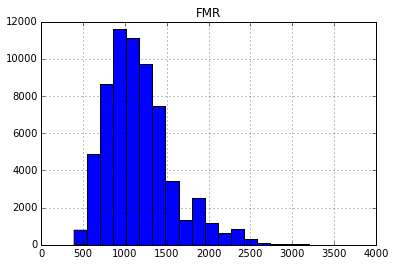

In [5]:
%matplotlib inline

# Create histogram of 'FMR' series within filtered dataframe.
filtered_housing_2013.hist(column='FMR', bins=20)

###7: Plot Histogram of Household Age

We can specify any numerical column we want and immediately see a histogram. We don't need to go through a chart wizard every time or any cumbersome setup process. Because the DataFrame object is highly optimized for speed, even if our dataset has hundreds of thousands of rows, we still see a histogram of values immediately. Let's now dive into the notation!

If you observe the notation:

    filtered_housing_2013.hist(column='FMR', bins=20)

we wrote out the name of the filtered DataFrame, filtered_housing_2013, and then attached .hist(), with some parameters (or settings) specified in the parentheses. We used column='FMR ' to specify that we want a histogram of the values in the FMR column. We also use bins=20 to specify that we want the histogram to be split up into 20 bins, or groups. You'll notice that we surrounded FMR with single quotes, but didn't surround the 20 in bins=20 with any quotes. This is because in Python, and in most languages, using quotes explicitly specifies that we want to interpret the input as text, and not as a command or an integer. We didn't place 20 in quotes because we wanted to treat 20 as a number instead of a text string. If we had a column called 45 and we wanted to plot the histogram for it, we would need to surround 45 with quotes as so: .hist(column='45').

###8: Experimenting with Histograms

Running the following code block will plot the FMR and AGE1 columns as histograms using 20 bins each. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4D5828>]], dtype=object)

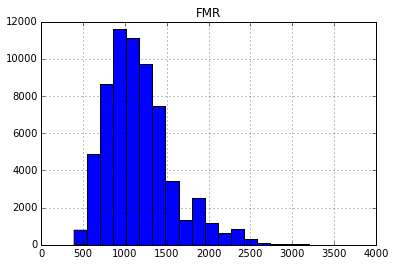

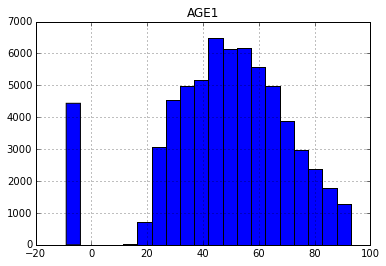

In [6]:
%matplotlib inline

# Create histograms of 'FMR' and 'AGE1' series within filtered dataframe.
filtered_housing_2013.hist(column='FMR', bins=20)
filtered_housing_2013.hist(column='AGE1', bins=20)

###9: Bad Data

looks like there's a problem with our dataset. This shows how a histogram can be used to eyeball issues with your data and explore further. In this case, we can't have any rows where the age of the head of household is negative and our histogram indicates that there are about 4500 problematic rows. Pandas thankfully makes it easy for us to just select relevant rows while avoiding irrelevant rows. Let's explore how we can use a technique called conditional filtering to pull out just the rows we want.

###10: Introduction to Conditional Filtering

Conditional filtering is a way to filter our DataFrame by specifying criteria that can be evaluated to True or False. We can use conditional filtering to select the rows in a DataFrame that meet a certain criteria and those that don't. In this case, we only want to select rows that contain a postive value for AGE1. Therefore, our filter should evaluate to True whenever the AGE1 value for a row is greater than 0, and False whenever it's less than 0. We can express that criteria in Python:

    filtered_housing_2013['AGE1'] > 0

Let's now practice assigning objects by assigning the results of this filter to an object called evaluated_row_numbers.

####Instructions

Assign the result of the conditional filter to the object, evaluated_row_numbers. You will need to replace the brackets [] on the right side of the equals sign with the conditional filter we wrote. Then, run print(evaluated_row_numbers) to observe the results.

In [7]:
# Create new dataframe which includes boolean eval of 'AGE1'.
evaluted_row_numbers = []
evaluated_row_numbers = filtered_housing_2013['AGE1'] > 0

evaluated_row_numbers.head(5)

0    True
1    True
2    True
3    True
4    True
Name: AGE1, dtype: bool

###11: Applying the Conditional Filter

We now have a list evaluated_row_numbers that has a value, True or False, for every row number. We can now use this list to select just the rows where the filter criteria is True through bracket notation. Bracket notation is the primary way to filter either rows or columns. Earlier, we used bracket notation to filter columns:

    filtered_housing_2013 = housing_2013[[ 'AGE1', 'BURDEN', 'FMR', 'FMTBEDRMS', 'FMTBUILT', 'TOTSAL' ]]

We surrounded the column names with brackets to specify that we want the contents to be treated as a list. We will now repeat the same pattern for filtering rows:

    cleaned_housing_2013 = filtered_housing_2013[evaluated_row_numbers]

In [8]:
# Apply boolean eval of 'AGE1' to return new dataframe with desired rows.
cleaned_housing_2013 = filtered_housing_2013[evaluated_row_numbers]

cleaned_housing_2013.head(10)

,AGE1,FMR,TOTSAL
0,82,956,0
1,50,1100,123000
2,53,1100,28000
3,67,949,0
4,26,737,96900
5,56,657,15000
6,50,988,70001
7,26,773,20000
8,60,1125,107000
9,26,552,48000


##12: Calculating the Difference in DataFrames

Quickly count the number of rows in filtered_housing_2013, the number of rows in cleaned_housing_2013, and the difference between both. We use len() to count the length of objects in Python. In Python, you can use the minus symbol -, just like you would with a calculator, to calculate the difference between two counts.

In [9]:
filtered_count = len(filtered_housing_2013)
cleaned_count = len(cleaned_housing_2013)
count_diff = filtered_count - cleaned_count

print("count_diff:",count_diff)

count_diff: 4438


##13: Verifying the Cleanup

4438 closely matches the initial guess we had of 4500 while eyeballing the histogram. To verify the cleanup further, let's write and apply a filter that verifies that there are no rows left with a negative value for AGE1. Our filter criteria needs to be the opposite of the one we wrote earlier, since we want the filter to evaluate to True when AGE1 is negative and False when positive. Then, we'll evaluate the filter on cleaned_housing_2013 and assign the resulting DataFrame to negative_housing_2013. Finally, let's print the length of the resulting DataFrame using len().

In [10]:
# Create new dataframe which includes boolean eval of 'AGE1'.
negative_row_numbers = cleaned_housing_2013['AGE1'] < 0

# Apply boolean eval of 'AGE1' to return new dataframe with desired rows.
negative_housing_2013 = cleaned_housing_2013[negative_row_numbers]

print("negative_housing_2013:", len(negative_housing_2013))

negative_housing_2013: 0


##14: Conclusion

We have zero rows in negative_housing_2013, which means that cleaned_housing_2013 didn't have any rows where the value for AGE1 was negative (or it would have the rows where it was). In the next mission, we are going to walk through how we can repeat our data cleanup for the 2005 and 2007 datasets of the same study without rewriting the logic each time.